In [2]:
import xgboost as xgb 
import pandas as pd 
import seaborn as sbn 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier 

In [3]:
data = pd.read_csv('Stars.csv')

data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [4]:
object_cols = ['Color', 'Spectral_Class']

# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# encoded_data = pd.DataFrame(encoder.fit_transform(data[object_data]))
encode = OrdinalEncoder()
star_data = data.copy()

required_cols = ['Temperature', 'L', 'R', 'A_M', 'Type']
star_data[object_cols] = encode.fit_transform(data[object_cols])

star_data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8.0,5.0,0
1,3042,0.000500,0.1542,16.60,8.0,5.0,0
2,2600,0.000300,0.1020,18.70,8.0,5.0,0
3,2800,0.000200,0.1600,16.65,8.0,5.0,0
4,1939,0.000138,0.1030,20.06,8.0,5.0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0.0,6.0,5
236,30839,834042.000000,1194.0000,-10.63,0.0,6.0,5
237,8829,537493.000000,1423.0000,-10.73,9.0,0.0,5
238,9235,404940.000000,1112.0000,-11.23,9.0,0.0,5


In [5]:
x = star_data.drop(columns=['Type'])
y = star_data['Type'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [10]:
model = xgb.XGBClassifier(
                        objective='multi:softmax',
                        max_depth=5,
                        n_estimators=100,
                        random_state=42,
                        learning_rate=0.1,
                    )

# model = RandomForestClassifier()

model.fit(x_train, y_train)
star_type = model.predict(x_test)

type_acc = model.score(x_test, y_test)

type_acc

1.0

In [11]:
report = classification_report(y_test, star_type)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



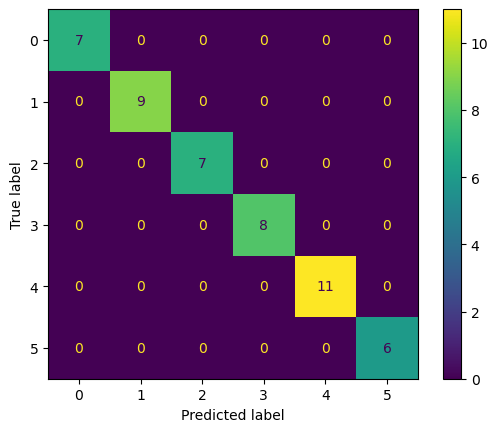

In [12]:
c_matrix = confusion_matrix(y_test, star_type)
matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
matrix_display.plot()

<Axes: >

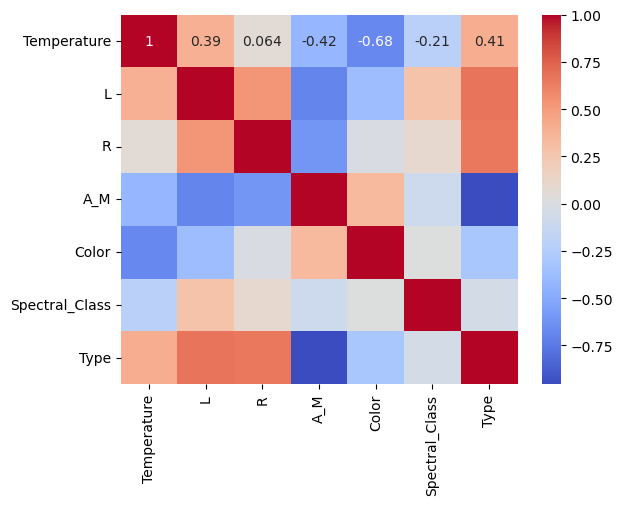

In [13]:
correl = star_data.corr()
sbn.heatmap(correl, cmap='coolwarm', annot=True)